In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [40]:
pd.set_option('display.max_column',None)

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [42]:
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [43]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

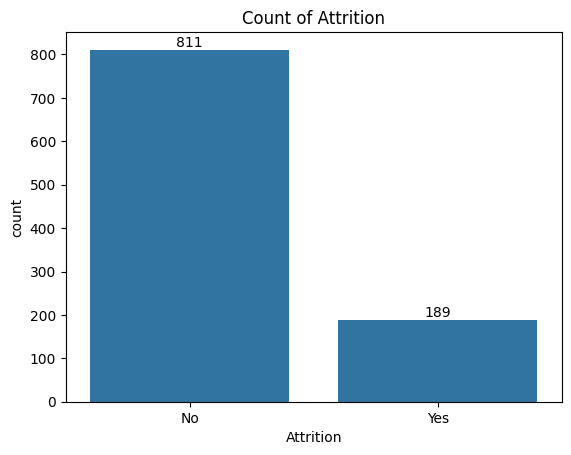

In [44]:
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# feature encoding

In [45]:
df_encoded = df.copy()

one_hot_map = {
     'Attrition': {'No': 0, 'Yes': 1},
     'Gender': {'Female': 0, 'Male': 1},
     'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

nominal_cols = ['Marital_Status','Department','Job_Role']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)




{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
201,202,35,1,0.0,0.0,3.0,5,13310,58,17,11,7,1,5,1,74,1,9,46,13,4,1,3,11,2,1
741,742,24,1,2.0,2.0,1.0,5,8077,98,28,13,8,1,4,3,83,1,8,58,3,3,4,4,33,3,0
822,823,55,1,1.0,2.0,0.0,3,6225,28,4,13,3,3,4,2,68,1,2,32,0,2,1,1,25,4,1
240,241,39,1,2.0,4.0,2.0,5,10211,90,21,2,7,1,1,3,89,1,4,56,5,4,3,1,8,1,0
528,529,59,0,1.0,1.0,2.0,2,3731,82,6,8,9,1,1,2,62,0,8,51,14,2,2,2,46,1,0


In [46]:
df.loc[480]

,480
Employee_ID,481
Age,31
Gender,Female
Marital_Status,Single
Department,Marketing
Job_Role,Manager
Job_Level,5
Monthly_Income,4191
Hourly_Rate,63
Years_at_Company,18


#Separete Features and target

In [47]:
X = df_encoded.drop('Attrition',axis = 1)
y = df_encoded['Attrition']

In [48]:
X.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,1,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,2,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,3,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,4,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,5,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [49]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


#Split Data

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [51]:
X_train.shape, X_test.shape

((700, 25), (300, 25))

In [52]:
X_train.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,106,41,0,1.0,3.0,1.0,2,6144,65,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,69,59,0,2.0,4.0,2.0,3,3935,24,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,480,56,0,1.0,4.0,3.0,1,15478,99,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,400,49,1,1.0,1.0,3.0,4,9040,35,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,435,52,0,2.0,3.0,0.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [53]:
X_test.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,994,24,1,0.0,0.0,3.0,2,16465,32,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,860,25,0,0.0,1.0,0.0,5,18871,51,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,299,43,1,1.0,0.0,2.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,554,58,0,0.0,4.0,1.0,3,18859,58,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,673,31,0,2.0,4.0,3.0,3,10509,19,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


#Decision tree Classifier

In [54]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       245
           1       0.18      0.27      0.22        55

    accuracy                           0.64       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.70      0.64      0.67       300



# dengan decision tree classifier mendapatkan akurasi 0.64 atau 64%

# Oversampling using SMOTENC

In [55]:
categorical_features = [
    'Age',
    'Job_Level',
    'Monthly_Income',
    'Hourly_Rate',
    'Years_at_Company',
    'Years_in_Current_Role',
    'Years_Since_Last_Promotion',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Training_Hours_Last_Year',
    'Project_Count',
    'Average_Hours_Worked_Per_Week',
    'Absenteeism',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement',
    'Distance_From_Home',
    'Number_of_Companies_Worked'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1135, 25), (487, 25))

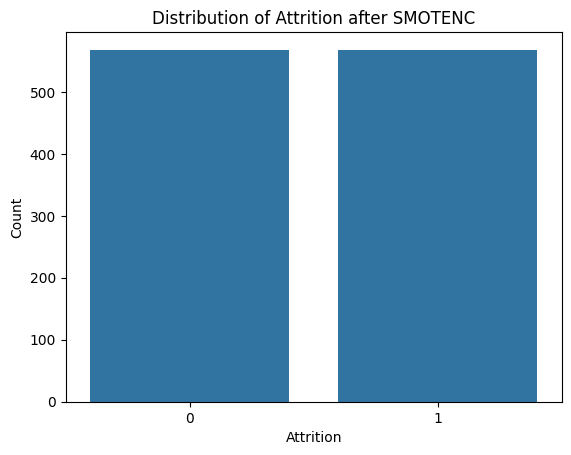

In [56]:
sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [57]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       244
           1       0.74      0.75      0.74       243

    accuracy                           0.74       487
   macro avg       0.74      0.74      0.74       487
weighted avg       0.74      0.74      0.74       487



#dengan menggunakan SMOTENC didapatkan accuracy test sebesar 0.77 atau 77% lebih tinggi dari pada decision tree classifier

#Kcross Validation

In [58]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt =1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [59]:
score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.71028037 0.72781065 0.71034483 0.75471698 0.74929577]
Average score: 0.73


In [60]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'random_state': 41}
Best cross-validation f1 score: 0.743


#Feature IMportance

In [61]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.04845306 0.02436169 0.00899561 0.02799225 0.0206598  0.40147979
 0.01890105 0.05946326 0.02542762 0.03486558 0.02503361 0.02795944
 0.         0.02621698 0.01127631 0.05283698 0.00646109 0.03972313
 0.02641317 0.01855775 0.00986889 0.0103575  0.00422176 0.07047367
 0.        ]


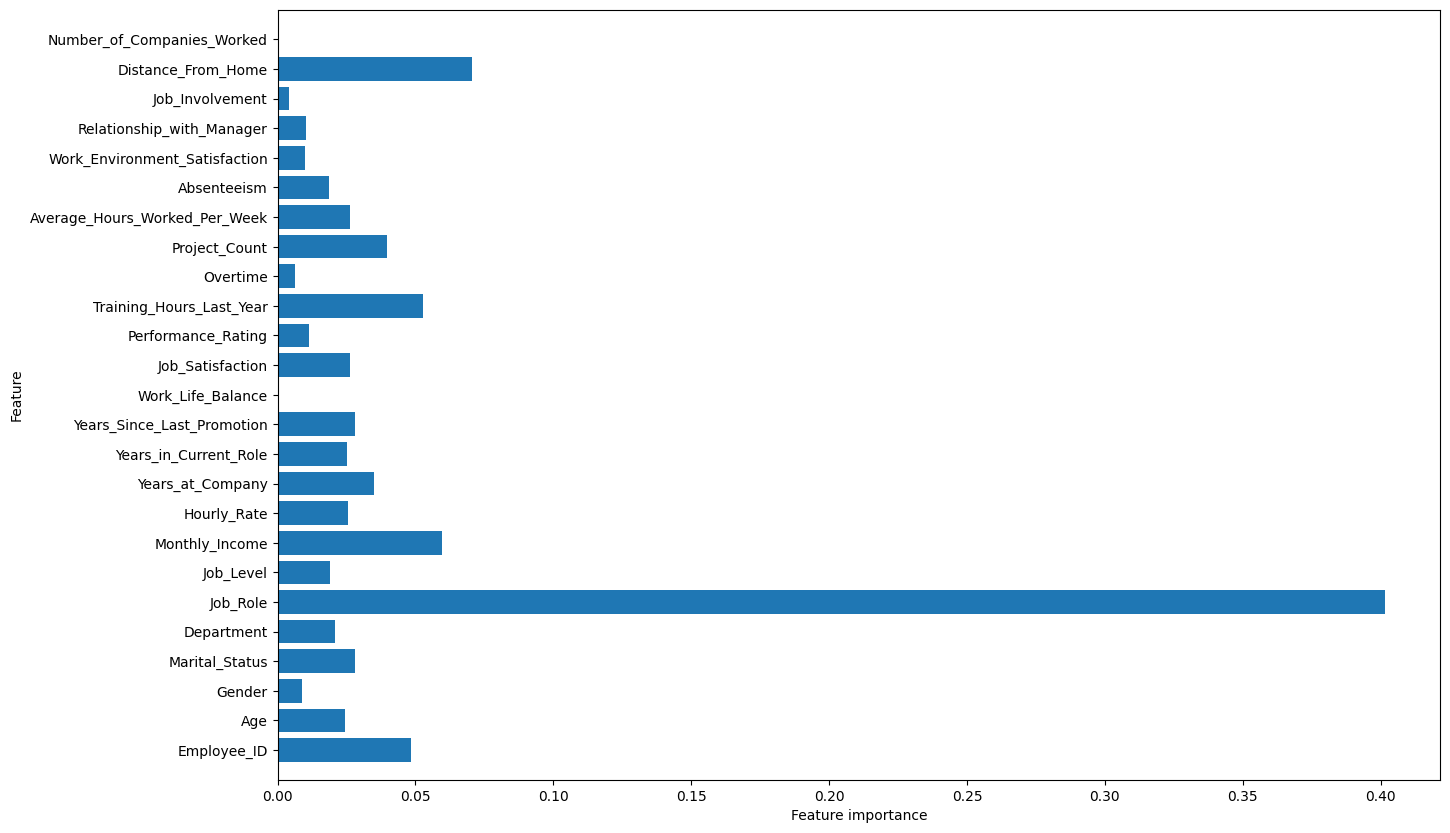

In [62]:
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [63]:
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Job_Role,0.401480
Distance_From_Home,0.070474
Monthly_Income,0.059463
Training_Hours_Last_Year,0.052837


In [64]:
important_features = ["Job_Role","Distance_From_Home","Monthly_Income"]
X_importance = df_encoded[important_features]
y_importance = df_encoded['Attrition']

In [65]:
display(X_importance)
display(y_importance)

,Job_Role,Distance_From_Home,Monthly_Income
0,3.0,20,15488
1,1.0,25,13079
2,1.0,45,13744
3,3.0,35,6809
4,2.0,44,10206
...,...,...,...
995,0.0,24,4172
996,3.0,39,11007
997,2.0,33,4641
998,2.0,41,19855


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [66]:
categorical_features = ["Job_Role", "Monthly_Income"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)


X_train.shape, X_test.shape

((1135, 3), (487, 3))

In [67]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       255
           1       0.72      0.87      0.78       232

    accuracy                           0.77       487
   macro avg       0.78      0.78      0.77       487
weighted avg       0.79      0.77      0.77       487



# feature importance memiliki accuracy test yang sama dengan SMOTENC yaitu 77%

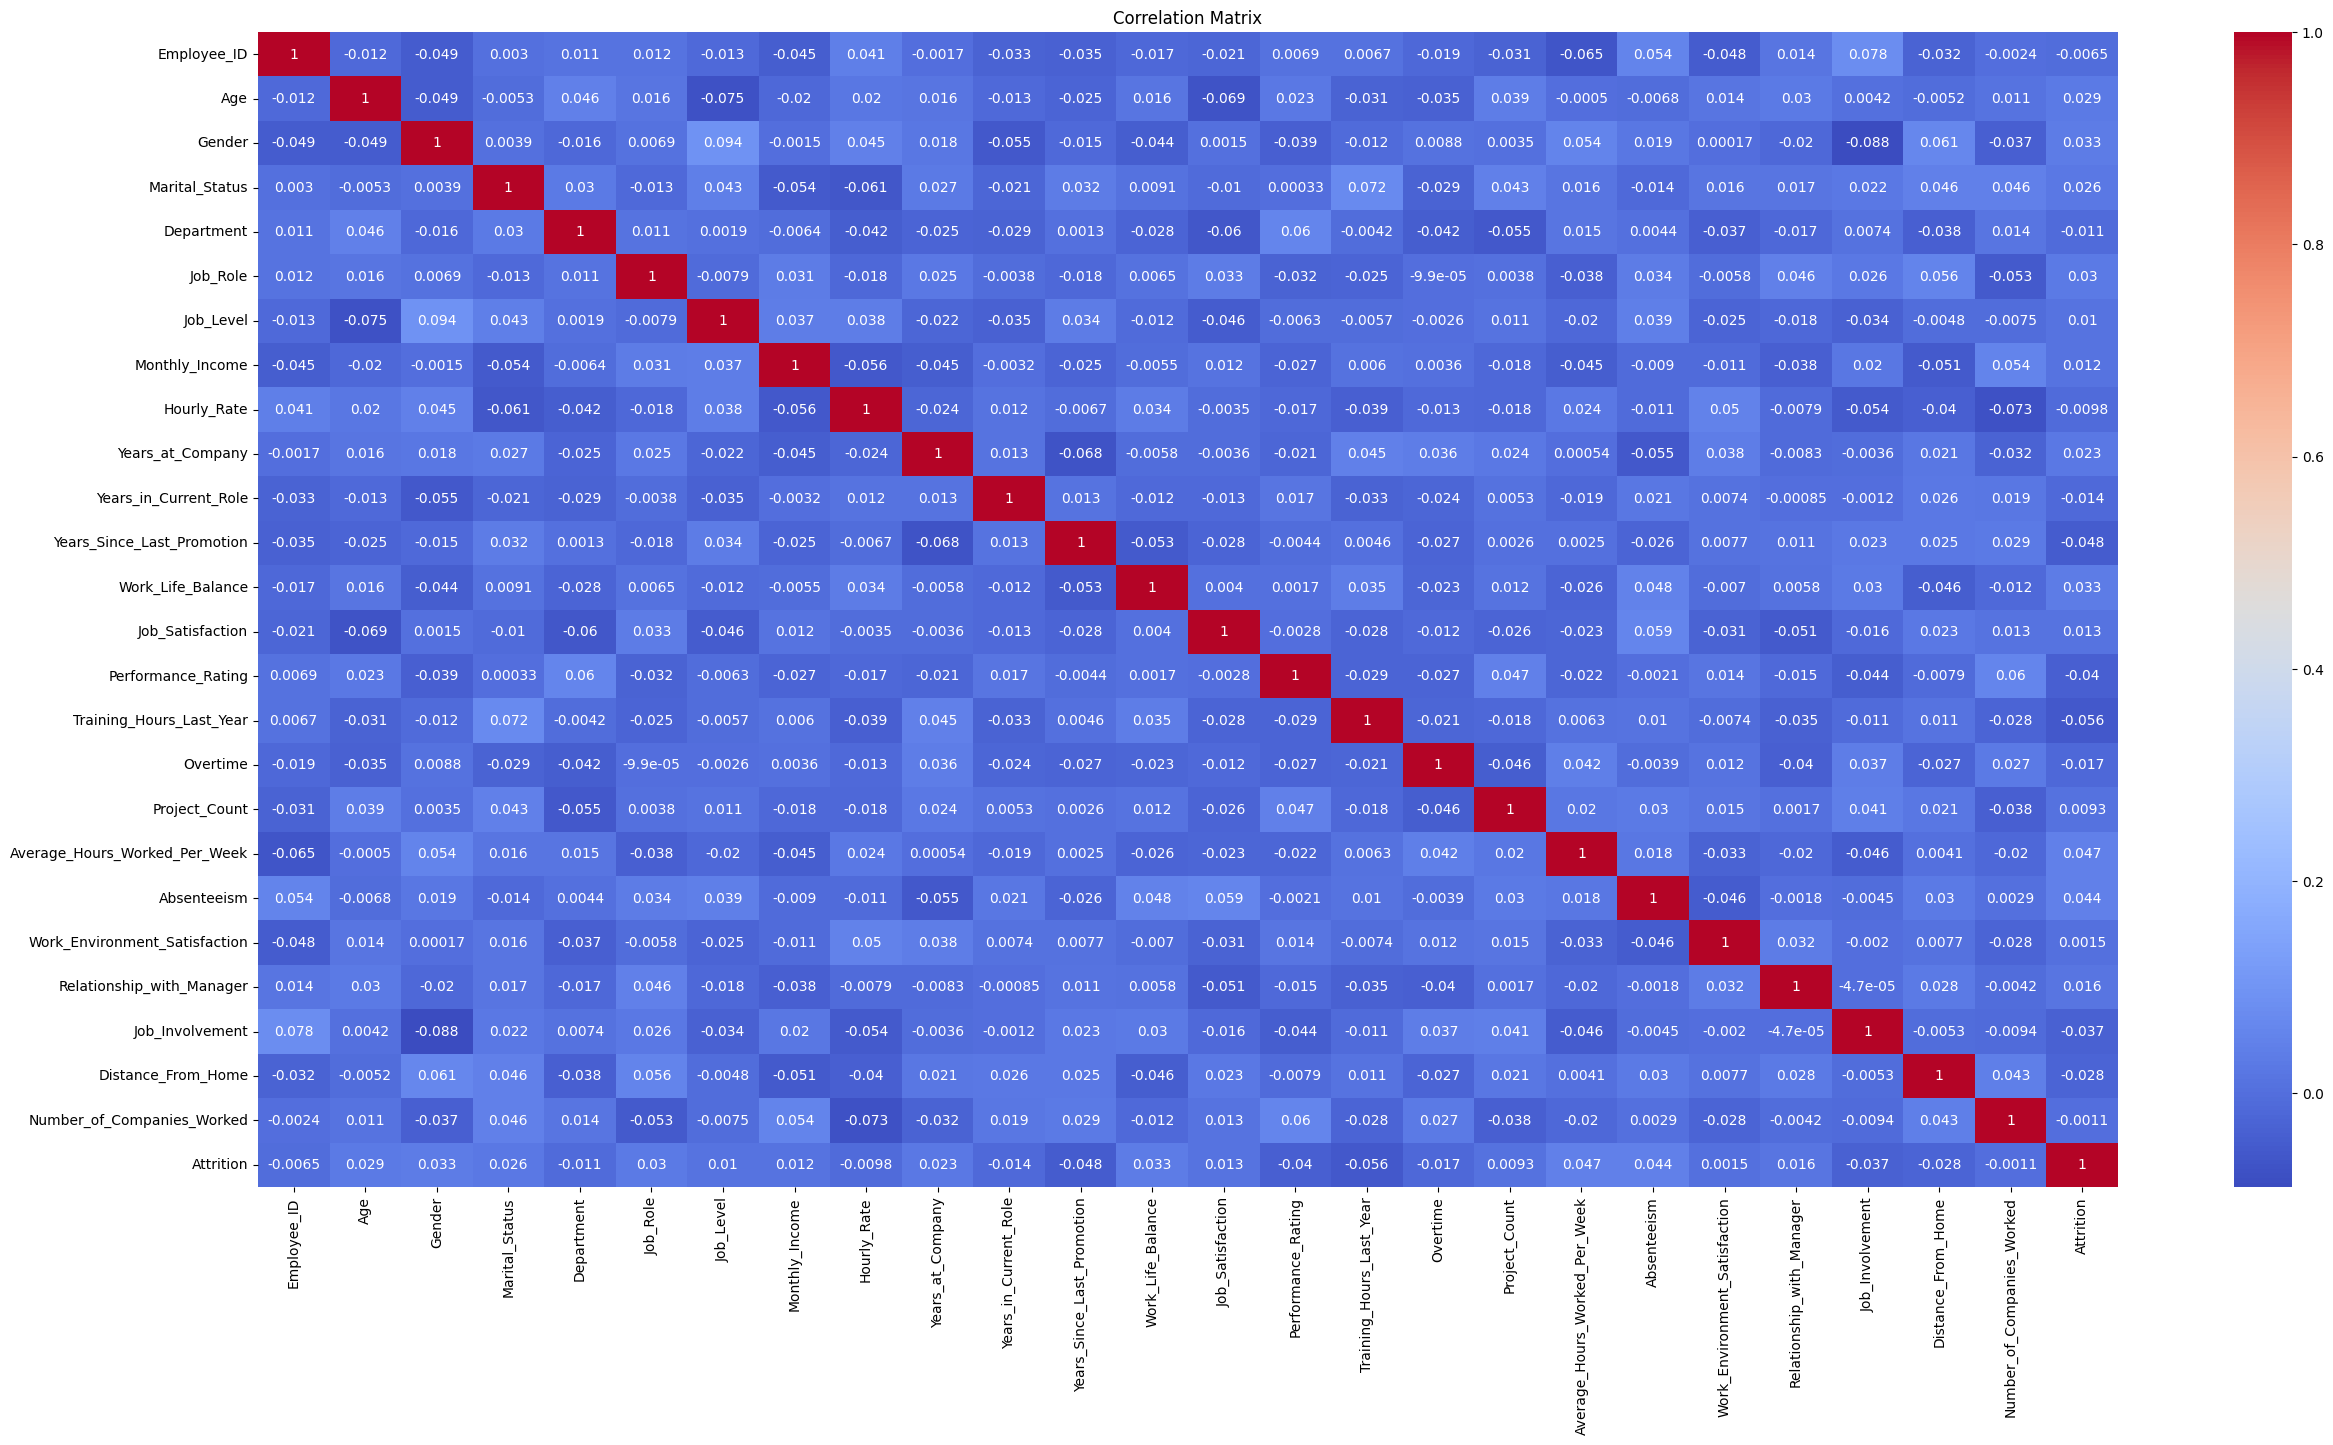

In [68]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [69]:
heatmap_features = ['Age', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
    'Years_in_Current_Role', 'Years_Since_Last_Promotion',
    'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
    'Training_Hours_Last_Year', 'Overtime', 'Project_Count',
    'Average_Hours_Worked_Per_Week', 'Absenteeism',
    'Work_Environment_Satisfaction', 'Relationship_with_Manager',
    'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']

X_heatmap = df_encoded[heatmap_features]
y_heatmap = df_encoded['Attrition']

In [70]:
from imblearn.over_sampling import SMOTENC

categorical_features = [
    'Gender', 'Marital_Status', 'Department', 'Job_Role',
    'Job_Level', 'Work_Life_Balance', 'Job_Satisfaction',
    'Performance_Rating', 'Work_Environment_Satisfaction',
    'Relationship_with_Manager', 'Job_Involvement', 'Overtime'
]

cat_indices = [X_heatmap.columns.get_loc(col) for col in categorical_features if col in X_heatmap.columns]
smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_res, y_res = smotenc.fit_resample(X_heatmap, y_heatmap)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)


print(X_train.shape, X_test.shape)


(1135, 19) (487, 19)


In [71]:
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       244
           1       0.66      0.76      0.70       243

    accuracy                           0.68       487
   macro avg       0.69      0.68      0.68       487
weighted avg       0.69      0.68      0.68       487



# Hyperparameter Tuning using Grid Search

In [72]:


X_train, X_test, y_train, y_test = train_test_split(
    X_heatmap, y_heatmap, test_size=0.2, random_state=42, stratify=y_heatmap
)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, 13, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}


dtree_clf = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=dtree_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=5,
    verbose=2
)


grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_


y_pred_test = best_dtree_clf.predict(X_test)

# Evaluasi performa
print(" Best parameters:", grid_search.best_params_)
print(" Best CV f1_weighted score: {:.3f}".format(grid_search.best_score_))
print(" Test Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_test)))
print(" Test F1 Score: {:.3f}".format(f1_score(y_test, y_pred_test, average='weighted')))


Fitting 5 folds for each of 672 candidates, totalling 3360 fits
 Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
 Best CV f1_weighted score: 0.743
 Test Accuracy: 0.770
 Test F1 Score: 0.719


In [73]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       649
           1       0.55      0.07      0.13       151

    accuracy                           0.81       800
   macro avg       0.69      0.53      0.51       800
weighted avg       0.77      0.81      0.75       800


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       162
           1       0.09      0.03      0.04        38

    accuracy                           0.77       200
   macro avg       0.45      0.48      0.45       200
weighted avg       0.67      0.77      0.71       200



#Hyperparameter Tuning using Grid Search juga menunjukkan accuracy sebesar 77%